#   Analisis de las matrices de confusión

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Rutas de los archivos

paths = {
    "Modelo con 1000 datos": "confusion_matrix_c_1000.csv",
    "Modelo con 5000 datos": "confusion_matrix_c_5000.csv",
    "Modelo con dataset completo": "confusion_matrix_complete.csv",
}
paths_complete = {
    "Modelo con dataset completo": "confusion_matrix_complete.csv"
}

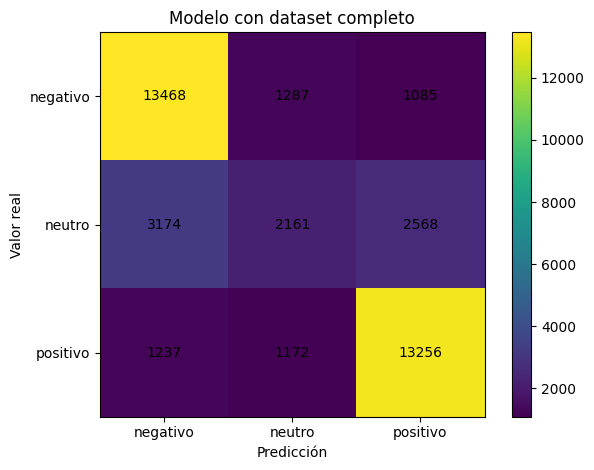

Accuracy por modelo:
Modelo con dataset completo: 0.7330


In [ ]:
def plot_confusion_matrix(cm, labels, title):
    plt.figure()
    plt.imshow(cm)
    plt.title(title)
    plt.xlabel("Predicción")
    plt.ylabel("Valor real")
    plt.xticks(range(len(labels)), labels)
    plt.yticks(range(len(labels)), labels)
    plt.colorbar()

    # Mostrar valores dentro de cada celda
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, int(cm[i, j]),
                     ha="center", va="center")

    plt.tight_layout()
    plt.show()

def accuracy_from_cm(cm):
    # Accuracy = suma de la diagonal / total de muestras
    return np.trace(cm) / np.sum(cm)

accuracies = {}

for name, path in paths_complete.items():
    df = pd.read_csv(path)

    labels = df.iloc[:, 0].values       # nombres de clases
    cm = df.iloc[:, 1:].values          # matriz numérica

    plot_confusion_matrix(cm, labels, name)
    accuracies[name] = accuracy_from_cm(cm)

print("Accuracy por modelo:")
for model, acc in accuracies.items():
    print(f"{model}: {acc:.4f}")

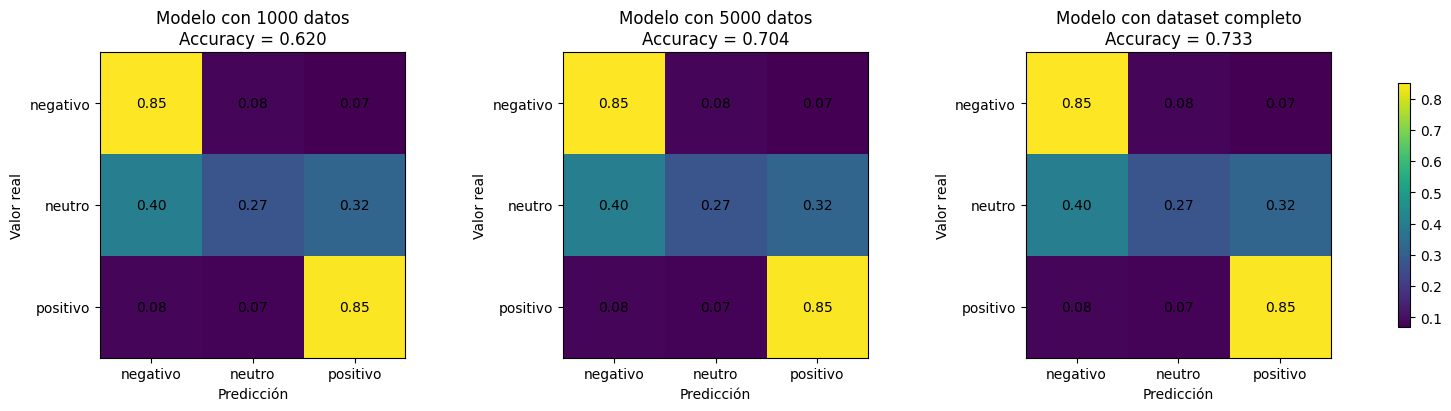

In [ ]:
# =========================
# Crear figura con subplots horizontales
# =========================
fig, axes = plt.subplots(
    nrows=1,
    ncols=len(paths),
    figsize=(15, 4),
    constrained_layout=True
)

# =========================
# Loop para cada modelo
# =========================
for ax, (name, path) in zip(axes, paths.items()):

    df = pd.read_csv(path)
    labels = df.iloc[:, 0].values
    cm = df.iloc[:, 1:].values

    # Normalización por filas
    cm_norm = cm / cm.sum(axis=1, keepdims=True)

    # Accuracy
    accuracy = np.trace(cm) / np.sum(cm)

    im = ax.imshow(cm_norm)
    ax.set_title(f"{name}\nAccuracy = {accuracy:.3f}")
    ax.set_xlabel("Predicción")
    ax.set_ylabel("Valor real")
    ax.set_xticks(range(len(labels)))
    ax.set_yticks(range(len(labels)))
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)

    # Valores dentro de cada celda
    for i in range(cm_norm.shape[0]):
        for j in range(cm_norm.shape[1]):
            ax.text(
                j, i,
                f"{cm_norm[i, j]:.2f}",
                ha="center",
                va="center"
            )

# =========================
# Barra de color compartida
# =========================
fig.colorbar(im, ax=axes, shrink=0.8)

plt.show()

## 1.- Análisis de resultados



Al observar las matrices de confusión presentadas de forma horizontal, se identifican diferencias claras en el desempeño de los modelos entrenados con distintos tamaños de dataset.

### 1.1.-Modelo entrenado con 1000 datos

Este modelo presenta una dispersión considerable fuera de la diagonal principal, especialmente en la clase neutro.
Se observa una alta confusión entre las clases neutro y positivo, así como entre neutro y negativo.

Esto indica que:
- El modelo no logra capturar adecuadamente los patrones semánticos de la clase neutra.
- El tamaño reducido del dataset limita su capacidad de generalización.
- Aunque clasifica razonablemente bien las clases extremas (negativo y positivo), falla en las fronteras semánticas.

En términos prácticos: el modelo es inestable y sensible al ruido.

### 1.2.-Modelo entrenado con 5000 datos

Este modelo muestra una mejora notable respecto al anterior:
- La diagonal principal es más dominante.
- Se reduce la confusión entre clases, especialmente en negativo y positivo.
- La clase neutro sigue siendo la más difícil, pero con un comportamiento más consistente.

Esto sugiere que:
- El aumento de datos permite aprender representaciones más robustas.
- El modelo comienza a generalizar mejor, aunque aún presenta ambigüedad en clases intermedias.

Es un modelo funcional y equilibrado, adecuado cuando el costo computacional o de datos es una limitación.

### 1.3.- Modelo entrenado con el dataset completo

Este modelo presenta el mejor desempeño global:
- La mayor concentración de valores se encuentra en la diagonal principal.
- La confusión entre clases es significativamente menor en todas las categorías.
- La clase neutro, históricamente problemática, muestra una mejora clara en precisión.

Desde el punto de vista estadístico y visual:
- Presenta la mayor accuracy.
- Exhibe un patrón de errores más controlado y predecible.
- Demuestra una mejor capacidad de generalización.

Este comportamiento es coherente con la teoría del aprendizaje automático: más datos relevantes → mejores representaciones → menor error.

### 1.4.- Conclusión

El modelo entrenado con el dataset completo es el que presenta el mejor desempeño, tanto visualmente en la matriz de confusión como cuantitativamente mediante la métrica de accuracy.

Comparado con los modelos entrenados con 1000 y 5000 datos, muestra una reducción consistente de la confusión entre clases y una mayor estabilidad en la clasificación de la clase neutra.

Por lo tanto, se concluye que el tamaño del dataset tiene un impacto significativo en la calidad del modelo, siendo el uso del dataset completo la opción más adecuada para aplicaciones donde se requiere mayor precisión y robustez.

El análisis confirma que, en problemas de clasificación multiclase con ambigüedad semántica, el incremento en la cantidad de datos de entrenamiento mejora de forma directa la capacidad del modelo para generalizar y reducir errores sistemáticos.